<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Histogram Based Gradient Boosting With Normalization

This code template is for classification analysis using a HistGradientBoostingClassifier and the feature rescaling technique called Normalizer. The implementation of HistGradientBoosting gets inspiration from the LightGBM framework.

### Required Packages

In [81]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as se 
from sklearn.preprocessing import LabelEncoder,Normalizer
from sklearn.model_selection import train_test_split 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [82]:
#filepath
file_path=" "

List of features which are  required for model training .

In [83]:
#x_values
features = []

Target feature for prediction.

In [84]:
#y_value
target=' ' 

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [85]:
df=pd.read_csv(file_path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [86]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [87]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [88]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

Encoded Target: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] to [0, 1, 2]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

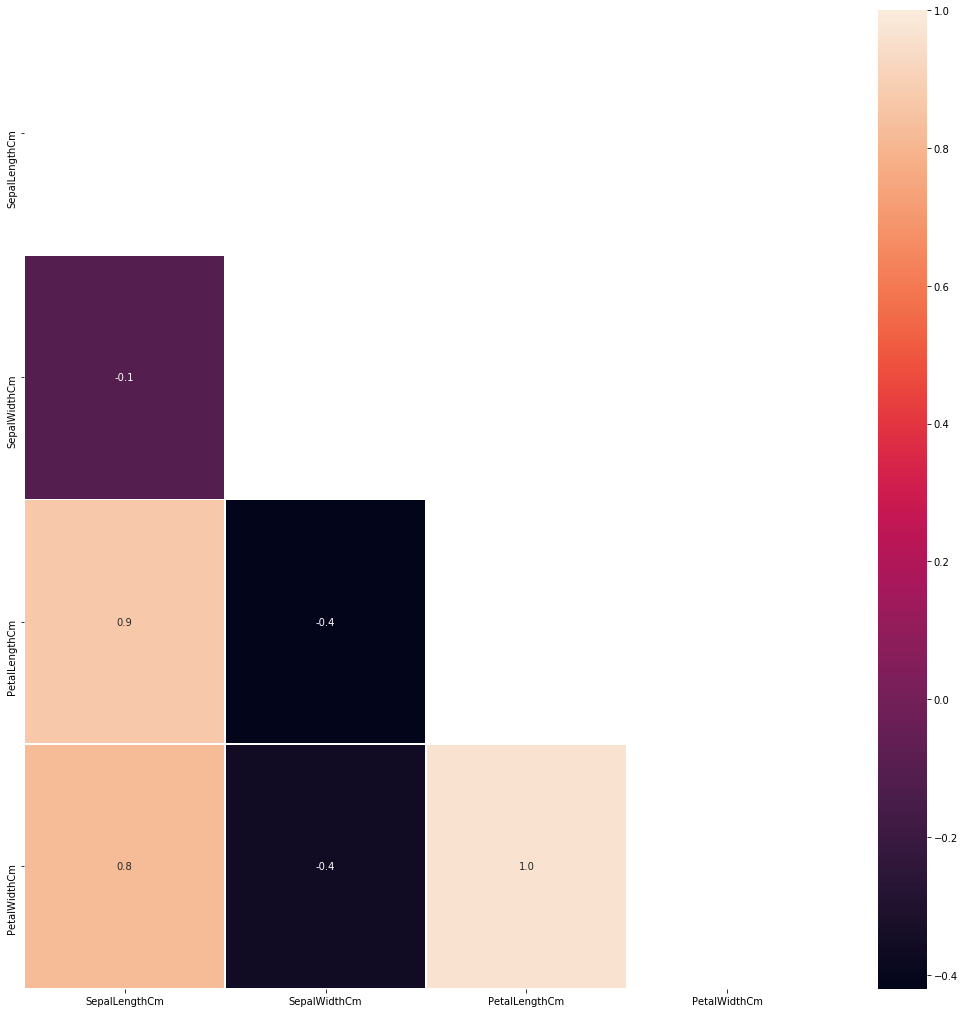

In [89]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Distribution Of Target Variable

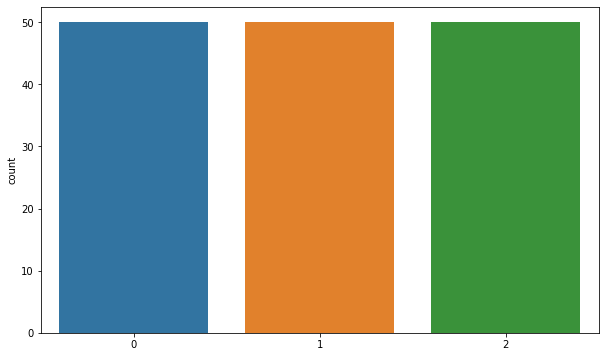

In [90]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Rescaling


Normalizer normalizes samples (rows) individually to unit norm.

Each sample with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.

We will fit an object of Normalizer to train data then transform the same data via fit_transform(X_train) method, following which we will transform test data via transform(X_test) method.

#### Normalizer function

Reference URL to Normalizer API :

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

In [91]:
X_Scaled=Normalizer().fit_transform(X)
X=pd.DataFrame(X_Scaled,columns=X.columns)


In [92]:
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269


### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [93]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Model

Histogram-based Gradient Boosting Classification Tree.This estimator is much faster than GradientBoostingClassifier for big datasets (n_samples >= 10 000).This estimator has native support for missing values (NaNs). 

[Reference](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html#sklearn.ensemble.HistGradientBoostingClassifier)

> **loss**: The loss function to use in the boosting process. ‘binary_crossentropy’ (also known as logistic loss) is used for binary classification and generalizes to ‘categorical_crossentropy’ for multiclass classification. ‘auto’ will automatically choose either loss depending on the nature of the problem.

> **learning_rate**: The learning rate, also known as shrinkage. This is used as a multiplicative factor for the leaves values. Use 1 for no shrinkage.

> **max_iter**: The maximum number of iterations of the boosting process, i.e. the maximum number of trees.

> **max_depth**: The maximum depth of each tree. The depth of a tree is the number of edges to go from the root to the deepest leaf. Depth isn’t constrained by default.

> **l2_regularization**: The L2 regularization parameter. Use 0 for no regularization (default).

> **early_stopping**: If ‘auto’, early stopping is enabled if the sample size is larger than 10000. If True, early stopping is enabled, otherwise early stopping is disabled.

> **n_iter_no_change**: Used to determine when to “early stop. The fitting process is stopped when none of the last n_iter_no_change scores are better than the n_iter_no_change - 1 -th-to-last one, up to some tolerance. Only used if early stopping is performed.

> **tol**: The absolute tolerance to use when comparing scores during early stopping. The higher the tolerance, the more likely we are to early stop: higher tolerance means that it will be harder for subsequent iterations to be considered an improvement upon the reference score.

> **scoring**: Scoring parameter to use for early stopping. 

In [94]:
model = HistGradientBoostingClassifier(random_state = 123)
model.fit(x_train, y_train)

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=123, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

#### Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [95]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 96.67 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

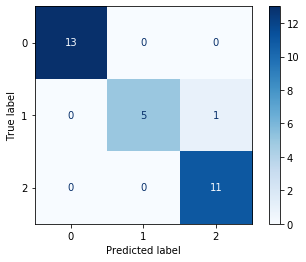

In [96]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [97]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.83      0.91         6
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



#### Creator: Surya Kiran , Github: [Profile](https://github.com/surya2365)